In [10]:
import pandas as pd

In [11]:
g_sitios = pd.read_parquet(r'C:\Users\mauri\OneDrive\Escritorio\proyectogrupal\data\google_sitios_v1.parquet', engine='pyarrow')
g_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888854 entries, 0 to 2888853
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   name            object 
 1   id_negocio      object 
 2   description     object 
 3   avg_rating      float64
 4   num_of_reviews  int64  
 5   price           object 
 6   url             object 
 7   id_estado       int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 165.3+ MB


In [12]:
g_sitios.head()

,name,id_negocio,description,avg_rating,num_of_reviews,price,url,id_estado
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,None,4.9,16,None,https://www.google.com/maps/place//data=!4m2!3...,1
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,4.5,6,None,https://www.google.com/maps/place//data=!4m2!3...,2
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,4.4,18,None,https://www.google.com/maps/place//data=!4m2!3...,2
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,None,3.3,6,None,https://www.google.com/maps/place//data=!4m2!3...,2
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,None,4.3,7,None,https://www.google.com/maps/place//data=!4m2!3...,2


In [13]:
categorias_g = pd.read_parquet(r'C:\Users\mauri\OneDrive\Escritorio\proyectogrupal\data\google_categories_final.parquet', engine='pyarrow')
categorias_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211324 entries, 0 to 6211323
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   gmap_id              object
 1   category_id_google   int64 
 2   category             object
 3   category_general     object
 4   id_category_general  int64 
dtypes: int64(2), object(3)
memory usage: 236.9+ MB


In [18]:
categorias_g.rename(columns={'gmap_id': 'id_negocio'}, inplace=True)
categorias_g = categorias_g.groupby('id_negocio').agg({'id_category_general': 'first'}).reset_index()
categorias_g.head()

,id_negocio,id_category_general
0,0x0:0x117c7fa82238f16a,3
1,0x0:0x13154eabf70b4b93,8
2,0x0:0x1cda8cf8c096e582,5
3,0x0:0x2522ed462fd64085,5
4,0x0:0x2ab217fc59211262,5


In [19]:
g_sitios= pd.merge(g_sitios, categorias_g[['id_negocio', 'id_category_general']], on='id_negocio', how='left')
g_sitios


,name,id_negocio,description,avg_rating,num_of_reviews,price,url,id_estado,id_category_general
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,None,4.9,16,None,https://www.google.com/maps/place//data=!4m2!3...,1,5.0
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,4.5,6,None,https://www.google.com/maps/place//data=!4m2!3...,2,5.0
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,4.4,18,None,https://www.google.com/maps/place//data=!4m2!3...,2,5.0
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,None,3.3,6,None,https://www.google.com/maps/place//data=!4m2!3...,2,5.0
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,None,4.3,7,None,https://www.google.com/maps/place//data=!4m2!3...,2,5.0
...,...,...,...,...,...,...,...,...,...
2888849,Steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,None,4.6,308,None,https://www.google.com/maps/place//data=!4m2!3...,12,3.0
2888850,"Jack Mcnerney Chevrolet, Inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,None,4.4,143,None,https://www.google.com/maps/place//data=!4m2!3...,13,4.0
2888851,Central Ny Spay Neuter Assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,None,4.3,88,None,https://www.google.com/maps/place//data=!4m2!3...,13,4.0
2888852,Ok Feed Store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,None,4.9,13,None,https://www.google.com/maps/place//data=!4m2!3...,5,4.0


In [21]:
google_filtrado = [14, 7]
g_sitios = g_sitios[g_sitios['id_category_general'].isin(google_filtrado)]
g_sitios

,name,id_negocio,description,avg_rating,num_of_reviews,price,url,id_estado,id_category_general
413,"Seligman Fountain - ""Bear and Faun""",0x89c2f6163ac2864f:0xa4213a2f66c15d8f,None,4.5,4,None,https://www.google.com/maps/place//data=!4m2!3...,13,14.0
509,101 Mobility,0x864c1f10c079a921:0x95710cd26231cc3,None,5.0,45,None,https://www.google.com/maps/place//data=!4m2!3...,6,7.0
539,Bayrunner Fishing Charters,0x88fc79ee1ededc73:0x7003065a75ee0cf4,None,4.8,34,None,https://www.google.com/maps/place//data=!4m2!3...,28,7.0
672,JLM Manufacturing,0x8824d759c04cb37b:0xef1cb7398b3d692e,None,3.7,33,None,https://www.google.com/maps/place//data=!4m2!3...,10,14.0
1239,All Time Auto Transport,0x88d9050582e1e64b:0x33457ba08c64df20,None,4.8,96,None,https://www.google.com/maps/place//data=!4m2!3...,5,14.0
...,...,...,...,...,...,...,...,...,...
2888708,Arro Corporation,0x880e49ad2e2a84fd:0x19e678ebd62178fc,None,3.6,5,None,https://www.google.com/maps/place//data=!4m2!3...,22,14.0
2888736,Hoquiam Licensing & Transportation Agency,0x54923990302cb3c7:0x10f023b56efdb019,None,4.3,94,None,https://www.google.com/maps/place//data=!4m2!3...,16,7.0
2888757,Fountain Hills Pool,0x89b62c2db5856cd3:0x89e0d1a12b77f78a,None,4.4,18,None,https://www.google.com/maps/place//data=!4m2!3...,24,7.0
2888759,Tanyard Cove,0x89b7fdc26ba070ef:0x376e99b8fe4bfc32,None,4.5,76,None,https://www.google.com/maps/place//data=!4m2!3...,24,7.0


In [28]:
conteo_negocios_por_estado = g_sitios.groupby('id_estado').size().reset_index(name='cantidad_negocios')
conteo_negocios_por_estado.sort_values(by='cantidad_negocios', ascending=False)

,id_estado,cantidad_negocios
1,2,5140
4,5,3715
5,6,3576
12,13,2993
11,12,1952
13,14,1566
21,22,1419
19,20,1360
9,10,1341
0,1,1323


In [35]:
# Calcular el total de negocios
total_negocios = conteo_negocios_por_estado['cantidad_negocios'].sum()

# Calcular el porcentaje del total para cada id_estado
conteo_negocios_por_estado['porcentaje'] = round((conteo_negocios_por_estado['cantidad_negocios'] / total_negocios) * 100,2)

# Mostrar el resultado
conteo_negocios_por_estado = conteo_negocios_por_estado.sort_values(by='porcentaje', ascending=False).head(5)

- 2 = New York 
- 5 = Florida
- 6 = Texas
- 13 = New Mexico
- 12 = Pennsylvania

C:\Users\mauri\AppData\Local\Temp\ipykernel_2952\2776785208.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id_estado', y='porcentaje', data=conteo_negocios_por_estado, palette='Blues_d')


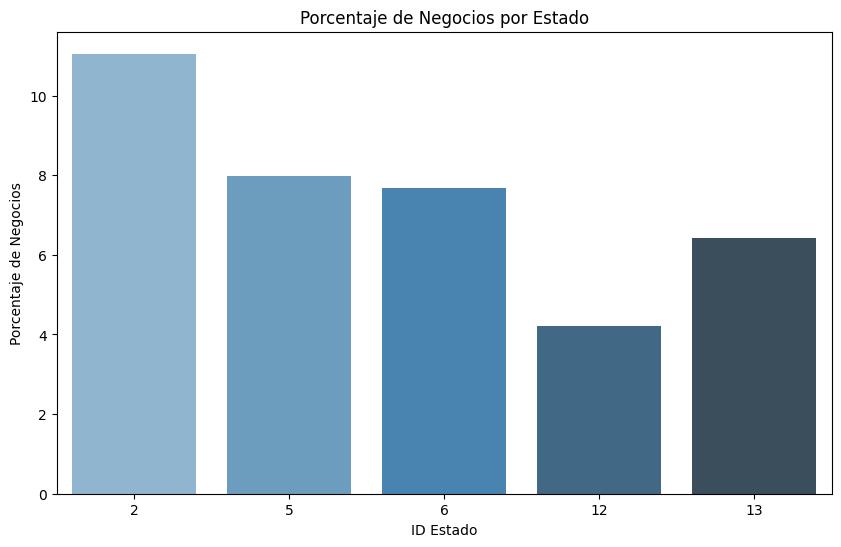

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#Crear el dataframe con los datos que ya tienes
import pandas as pd

#Crear el gráfico de barras con seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='id_estado', y='porcentaje', data=conteo_negocios_por_estado, palette='Blues_d')

#Añadir etiquetas y título
plt.xlabel('ID Estado')
plt.ylabel('Porcentaje de Negocios')
plt.title('Porcentaje de Negocios por Estado')

#Mostrar el gráfico
plt.show()